In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from tensorflow.keras.callbacks import TensorBoard

In [2]:
dat,metadat=tfds.load('cats_vs_dogs',as_supervised=True,with_info=True)

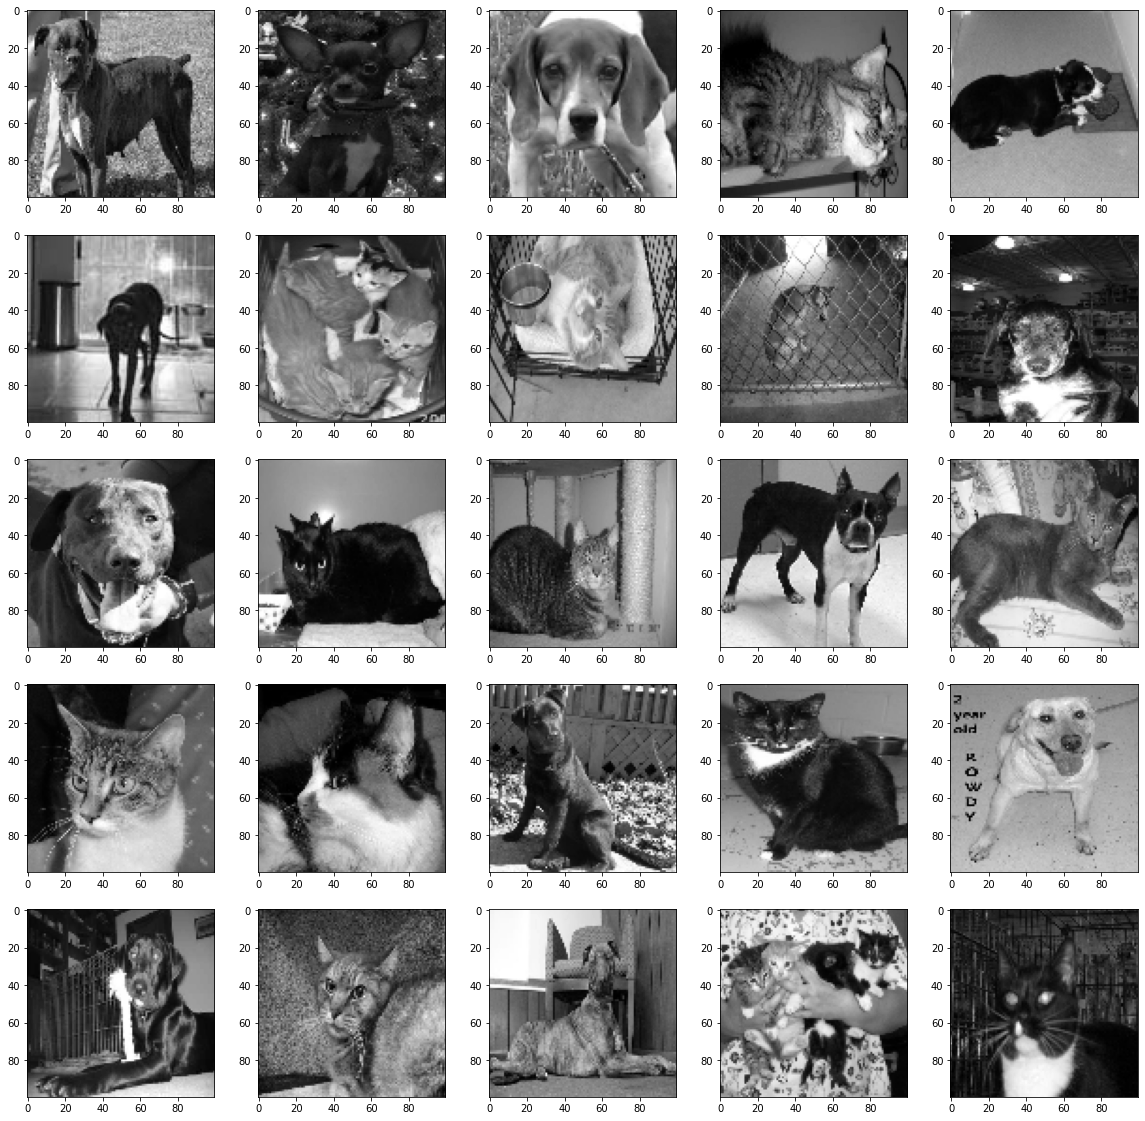

In [3]:
# tfds.as_dataframe(dat,metadat)
plt.figure(figsize=(20,20))
sizeimg=100
for i, (image,tag) in enumerate(dat['train'].take(25)):
    image=cv.resize(image.numpy(),(sizeimg,sizeimg))
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.imshow(image,cmap='gray')

In [4]:
dattrain=[]
for i, (image,tag) in enumerate(dat['train'].take(25)):
    image=cv.resize(image.numpy(),(sizeimg,sizeimg))
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image=image.reshape(sizeimg,sizeimg,1)
    dattrain.append([image,tag])
x=[]
y=[]


In [5]:
for image, tag in dattrain:
    x.append(image)
    y.append(tag)
x=np.array(x).astype(float)/255
y=np.array(y)

In [6]:
modelodenso=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(sizeimg,sizeimg,1)),
    tf.keras.layers.Dense(150,activation=tf.nn.relu),
    tf.keras.layers.Dense(150,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
modeloCNN=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(sizeimg,sizeimg,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
modeloCNN2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(sizeimg,sizeimg,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [7]:
modelodenso.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)
modeloCNN.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)
modeloCNN2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

In [8]:
tensorboarddenso=TensorBoard(log_dir='logs/denso')
modelodenso.fit(x,y,batch_size=32,validation_split=0.15,epochs=100,callbacks=tensorboarddenso)

Epoch 1/100
1/1 [==============================] - 1s 621ms/step - loss: 0.6772 - accuracy: 0.5714 - val_loss: 1.2188 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6660 - accuracy: 0.5714 - val_loss: 1.7532 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 3.1394 - accuracy: 0.4286 - val_loss: 0.7265 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 0.4451 - accuracy: 0.8095 - val_loss: 4.6541 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 2.4130 - accuracy: 0.5714 - val_loss: 3.0533 - val_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 1.4827 - accuracy: 0.5714 - val_loss: 0.6518 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 0.4091 - accuracy: 0.8571 - val_loss: 0.8115 - val_accuracy: 0.7500
Epoch 8/100
1/1 [==

In [9]:
tensorboardcnn=TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(x,y,batch_size=32,validation_split=0.15,epochs=100,callbacks=tensorboardcnn)

Epoch 1/100
1/1 [==============================] - 1s 754ms/step - loss: 0.6890 - accuracy: 0.5714 - val_loss: 0.9839 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 134ms/step - loss: 0.6841 - accuracy: 0.5714 - val_loss: 0.6583 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 138ms/step - loss: 0.6750 - accuracy: 0.4286 - val_loss: 0.7268 - val_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 134ms/step - loss: 0.6235 - accuracy: 0.9048 - val_loss: 0.9137 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 157ms/step - loss: 0.5920 - accuracy: 0.6667 - val_loss: 0.9746 - val_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 169ms/step - loss: 0.5554 - accuracy: 0.6667 - val_loss: 0.8600 - val_accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 138ms/step - loss: 0.4953 - accuracy: 0.8095 - val_loss: 0.7941 - val_accuracy: 0.2500
Epoch 8/100
1

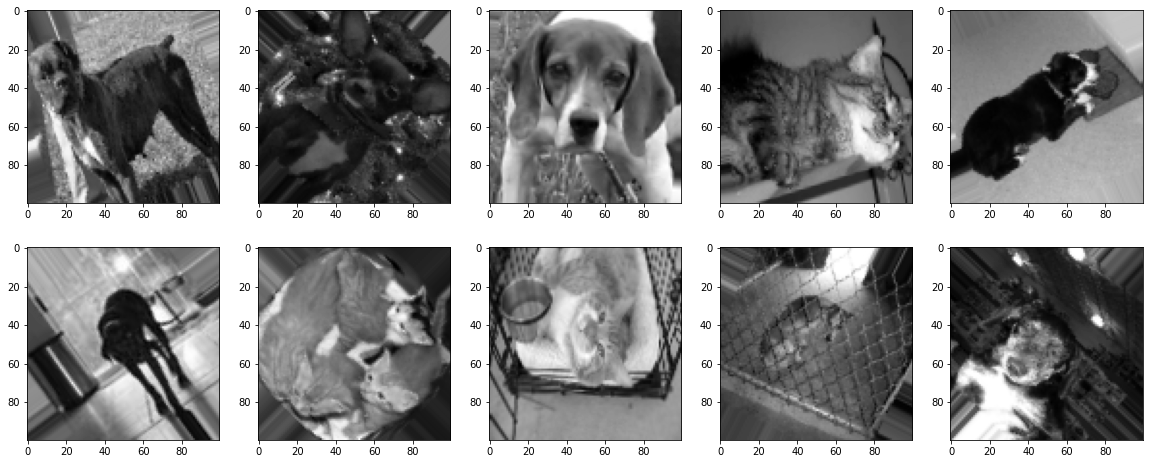

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=50)
datagen.fit(x)
plt.figure(figsize=(20,8))
for image,tag in datagen.flow(x,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].reshape(100,100),cmap="gray")
    break
